In [285]:
from img2table.ocr import TesseractOCR
from img2table.ocr import PaddleOCR
from img2table.document import Image
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
# Instantiation of OCR
ocr_tes = TesseractOCR(n_threads=1, lang="eng+ind")
ocr_pad = PaddleOCR(lang="id",
                kw={'layout':False, 'show_log':True, 'ocr':True})

In [287]:
def draw_bounding_box(image, tables):
    result = image.copy()
    for table in tables:
        for cell in table.content:
            for group in table.content[cell]:
                # Get bounding box coordinates
                
                x_min, y_min, x_max, y_max = (group.bbox.x1, group.bbox.y1, group.bbox.x2, group.bbox.y2)
                
                # Draw the rectangle on the image
                color = (0, 255, 0)  # Green color for the box
                thickness = 2  # Thickness of the rectangle
                cv2.rectangle(result, (x_min, y_min), (x_max, y_max), color, thickness)
    return result

In [294]:
def convert_img2txt(image_file):
    image = cv2.cvtColor(cv2.imread("testing_img\\"+image_file), cv2.COLOR_BGR2RGB)
    # Instantiation of document, either an image or a PDF
    doc = Image("testing_img\\"+image_file, detect_rotation=True)
    
    extracted_tables_tes = doc.extract_tables(ocr= ocr_tes, implicit_rows= True, implicit_columns= True,
                       borderless_tables= True)
    
    extracted_tables_pad = doc.extract_tables(ocr= ocr_pad, implicit_rows= True, implicit_columns= True,
                       borderless_tables= True)
    
    plt.figure(figsize=(8, 8))  # Set the figure size
    plt.imshow(draw_bounding_box(image, extracted_tables_tes))
    plt.axis('off')  # Hide axes for cleaner visualization
    plt.title("Bounding Boxes on Tesseract Extracted Tables")
    plt.savefig("bbox_result\\"+image_file.split(".")[0]+'_bbox_tes.png')
    
    plt.figure(figsize=(8, 8))  # Set the figure size
    plt.imshow(draw_bounding_box(image, extracted_tables_pad))
    plt.axis('off')  # Hide axes for cleaner visualization
    plt.title("Bounding Boxes on Paddle Extracted Tables")
    plt.savefig("bbox_result\\"+image_file.split(".")[0]+'_bbox_pad.png')

    return {'Tesseract': extracted_tables_tes, 'Paddle': extracted_tables_pad}

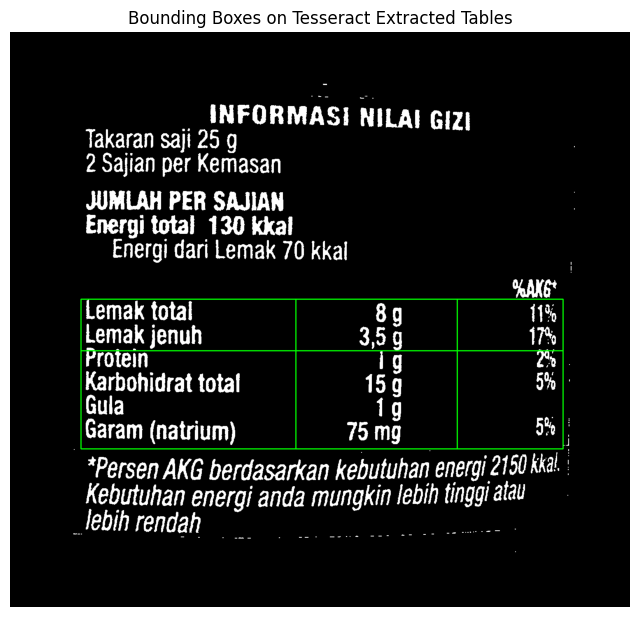

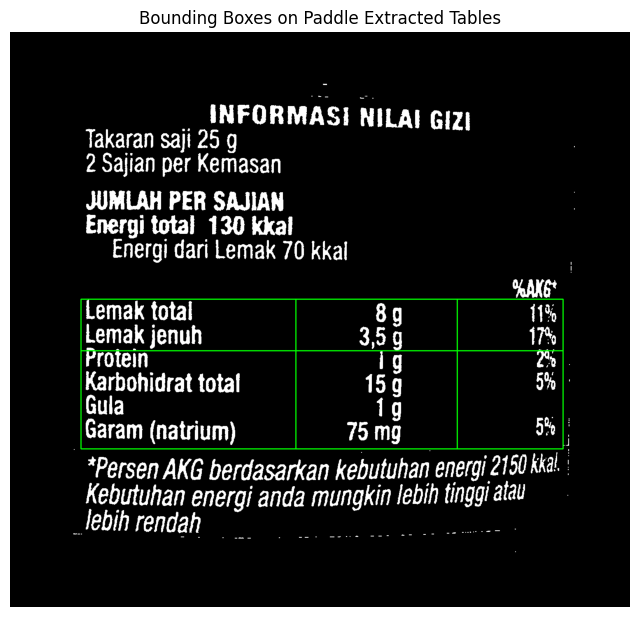

In [304]:
image_file_table = '8_image_without_lines_noise_removed.jpg'
result = convert_img2txt(image_file_table)

In [305]:
result['Paddle'][0].df

0                 1    2
0                           Lemak total\nLemak jenuh         89\n3,5 g  11%
1  Protein\nKarbohidrat total\nGula\nGaram (natrium)  15 g\n1 g\n75 mg   5%

In [295]:
imagefiles = [f for f in os.listdir('testing_img/') if os.path.isfile(os.path.join('testing_img/', f))]

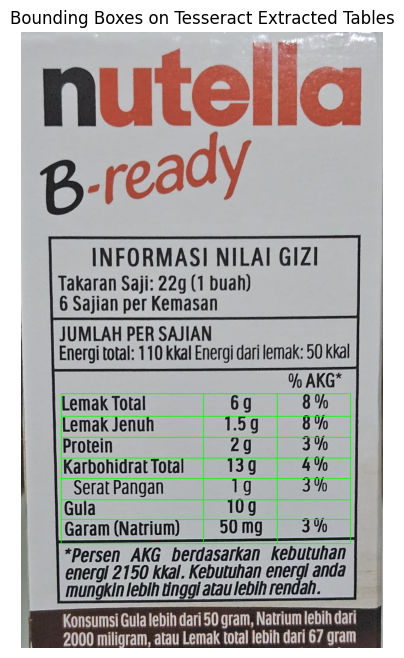

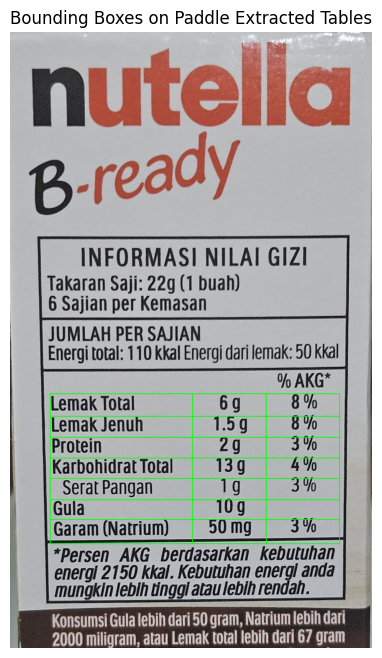

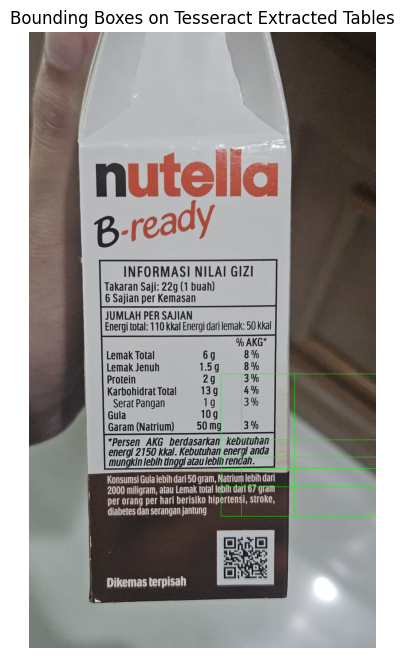

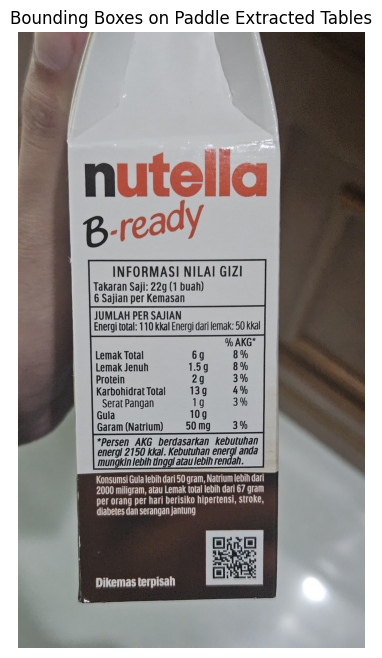

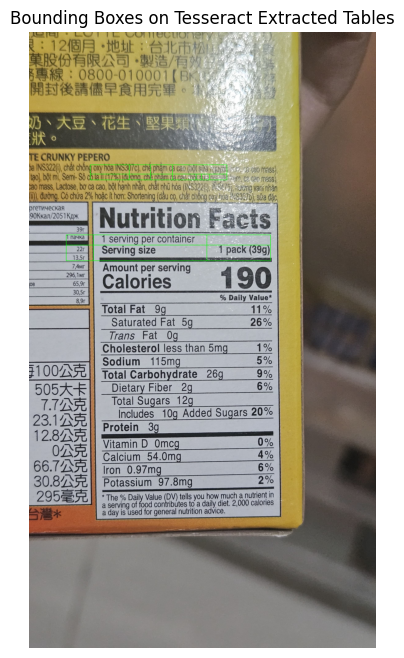

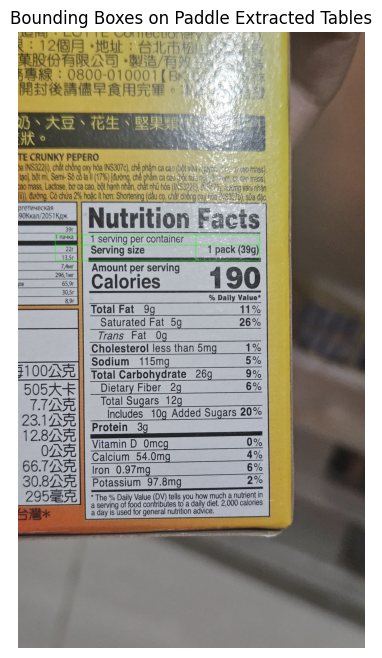

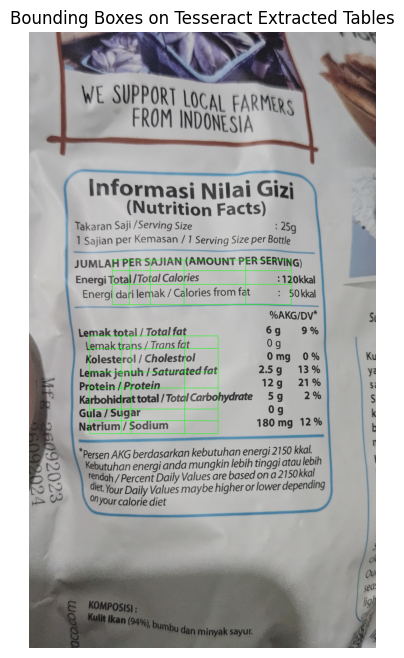

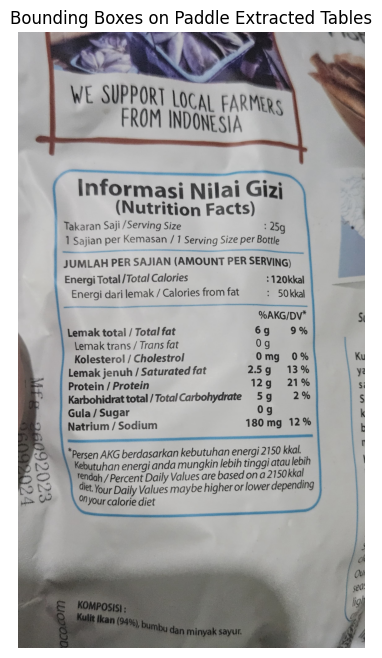

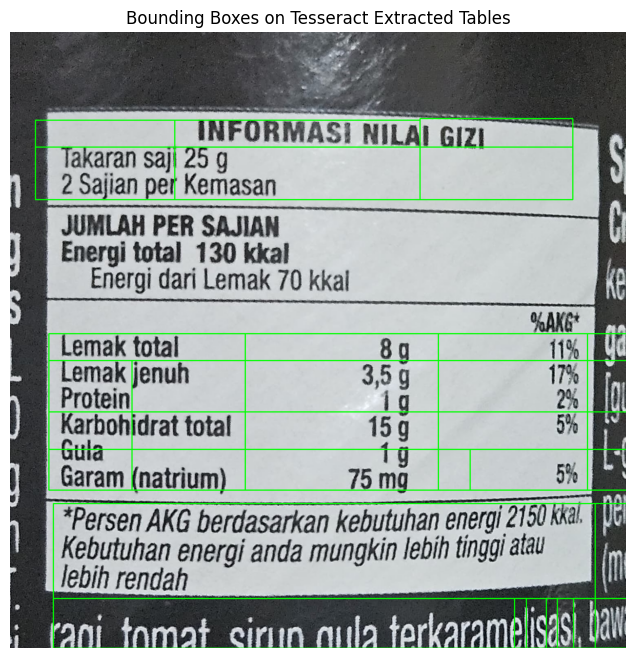

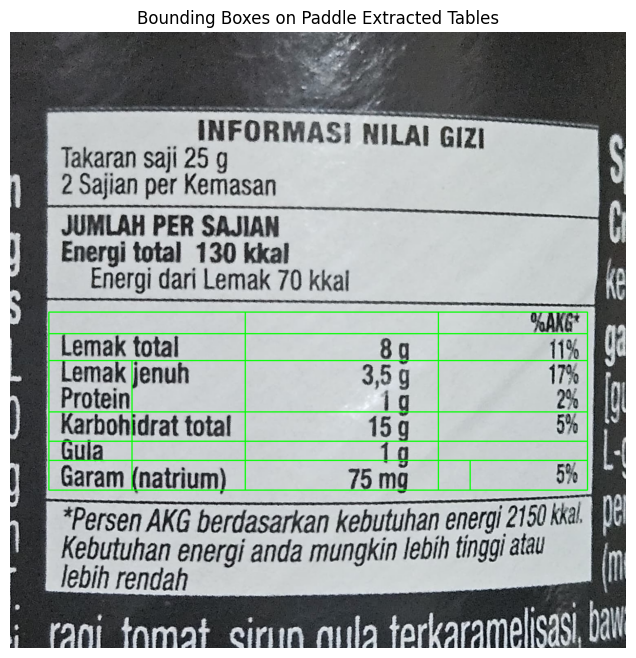

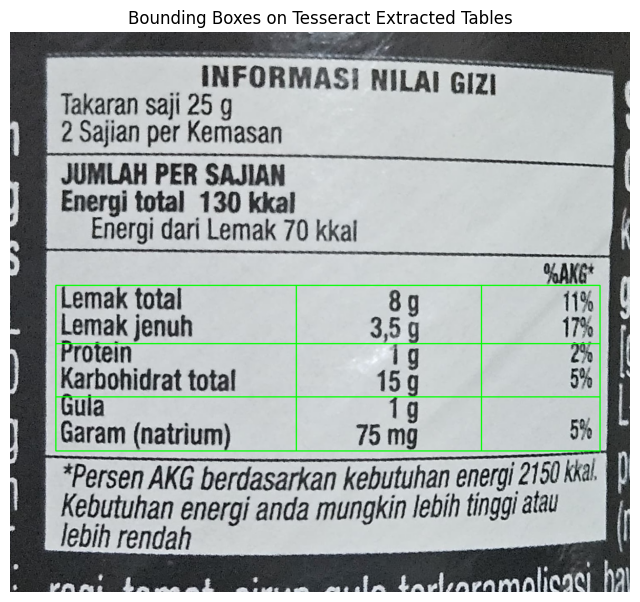

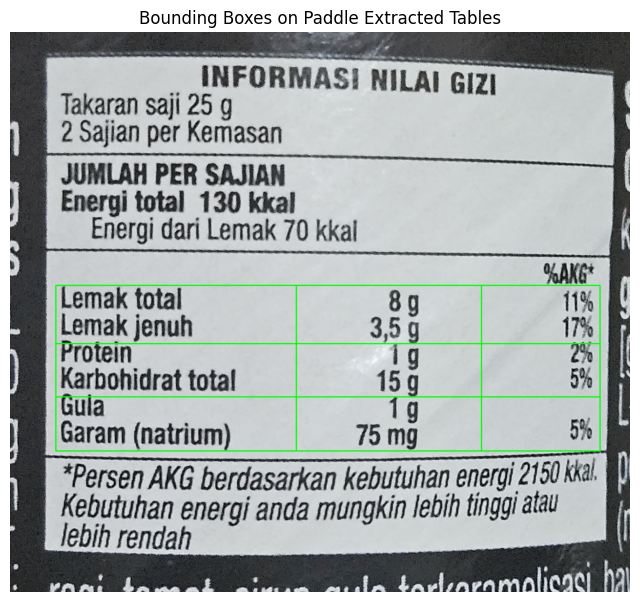

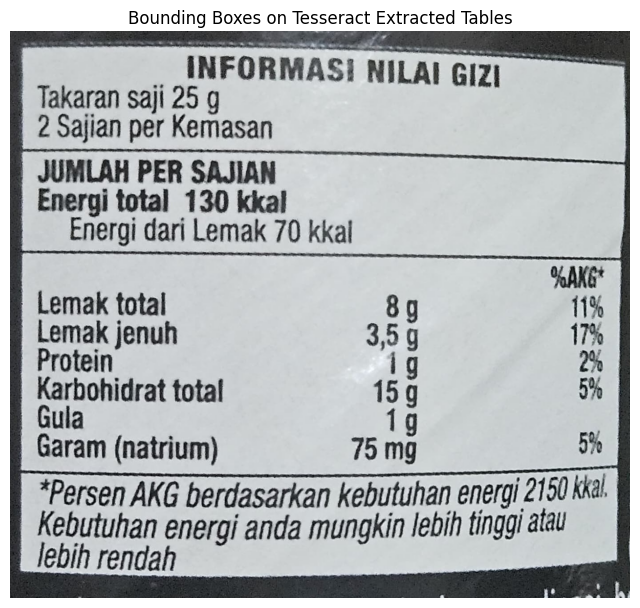

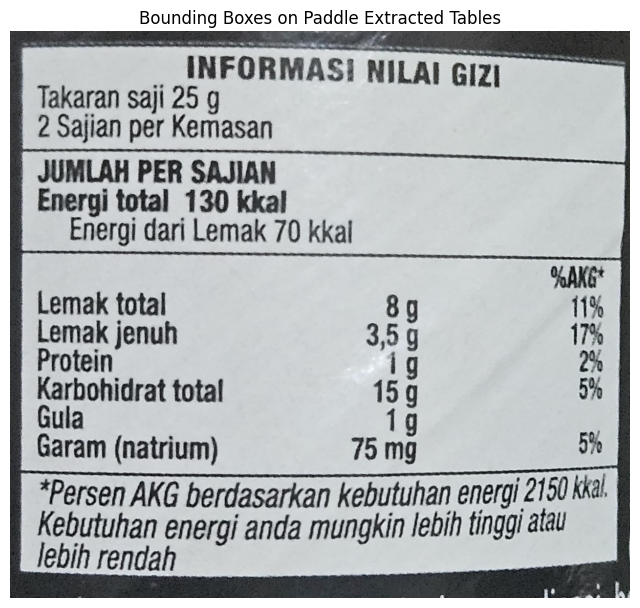

In [296]:
images_tables = {}
for image_file in imagefiles:
    images_tables.update({image_file:convert_img2txt(image_file)})

In [297]:
images_tables

{'IMG-20240528-WA0015 - Copy.jpg': {'Tesseract': [ExtractedTable(title=INFORMASI NILAI GIZI
   Takaran Saji: 22g (1 buah)
   6 Sajian per Kemasan
   Yo AKG”, bbox=(149, 1343, 1223, 1900),shape=(7, 3))],
  'Paddle': [ExtractedTable(title=INEORMASINILAIGIZI
   Takaran Saji:22g(1buah)
   6 Sajian per Kemasan
   JUMLAHPER SAJIAN
   Energi total:110 kkal Energi dari lemak:50kkal
   %AKG*, bbox=(149, 1343, 1223, 1900),shape=(7, 3))]},
 'IMG-20240528-WA0015.jpg': {'Tesseract': [ExtractedTable(title=aot
   es
   oo, bbox=(1246, 2220, 2768, 3144),shape=(5, 3))],
  'Paddle': []},
 'IMG-20240528-WA0018.jpg': {'Tesseract': [ExtractedTable(title=None, bbox=(397, 862, 1284, 960),shape=(2, 7)),
   ExtractedTable(title=mass, Lactose, bo ca cao, hanh nhan, chat nhu hoa
   166 chura 2% hoge It hon: Shortening (dau c9, chat chong oxy h
   du
   \
   |)
   4
   Nutrition
   39r, bbox=(241, 1317, 1567, 1485),shape=(2, 3))],
  'Paddle': [ExtractedTable(title=a INS322.chat chng oxy hóa INS307cche phm ca caob